In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.__version__

'2.3.3'

In [3]:
s = pd.Series([10,20,30,40,50])

In [4]:
type(s)

pandas.core.series.Series

In [5]:
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [6]:
s[0]  # access by index 

np.int64(10)

In [7]:
sales = pd.Series([10,20,40,30,50], index = ['mon','tue','wed','mon','fri'])   # Custom index

In [8]:
sales

mon    10
tue    20
wed    40
mon    30
fri    50
dtype: int64

In [9]:
sales['mon']

mon    10
mon    30
dtype: int64

In [10]:
sales.iloc[0]  # Using index (position) and not row label

np.int64(10)

In [11]:
marks = pd.Series([60,80,56,89,66], index =[101,102,103,104,105])

In [13]:
marks

101    60
102    80
103    56
104    89
105    66
dtype: int64

In [14]:
marks[101]

60

In [16]:
#marks[0]  # will throw error as 0 is taken as index

In [12]:
nums = pd.Series( np.random.randint(1,100,10), index = np.arange(11,21))

In [13]:
nums

11    40
12    66
13     5
14    47
15     9
16     9
17    43
18    71
19    85
20    51
dtype: int32

### Properties of Series

In [19]:
nums.is_unique

True

In [20]:
nums.axes   # Row labels or indexes

[Index([11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype='int32')]

In [21]:
print(nums.index),
print(type(nums.index))

Index([11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype='int32')
<class 'pandas.core.indexes.base.Index'>


In [22]:
# Convert Series to Numpy Array
print(nums.values, type(nums.values))

[40 82 91 94 41 52 12 69 32 86] <class 'numpy.ndarray'>


### loc and iloc properties

In [126]:
nums[11], nums.loc[11]   # Index (row label)

(2, 2)

In [127]:
nums.iloc[0]    # Position 

2

In [128]:
# for loc end range is inclusive  
nums.loc[11:15]

11     2
12    26
13    27
14    49
15    20
dtype: int32

In [129]:
nums.iloc[0:5]   # for iloc it is exclusive 

11     2
12    26
13    27
14    49
15    20
dtype: int32

#### Fancy indexing

In [23]:
nums > 50

11    False
12     True
13     True
14     True
15    False
16     True
17    False
18     True
19    False
20     True
dtype: bool

In [24]:
nums[ nums > 50 ]  # Boolean indexing

12    82
13    91
14    94
16    52
18    69
20    86
dtype: int32

In [25]:
nums.loc[[11,15,20]]  # Array of Row labels

11    40
15    41
20    86
dtype: int32

In [133]:
nums.iloc[[0,4,6]]    # Array of Row positions

11     2
15    20
17    70
dtype: int32

### Methods of Series 

In [26]:
nums.describe()

count    10.000000
mean     59.900000
std      28.423191
min      12.000000
25%      40.250000
50%      60.500000
75%      85.000000
max      94.000000
dtype: float64

In [27]:
summary = nums.describe()
print(type(summary))

<class 'pandas.core.series.Series'>


In [136]:
summary['mean'], summary['50%']

(44.1, 36.5)

In [137]:
summary['75%'] - summary['25%']   # IQR

38.5

In [138]:
nums.mean()

44.1

In [139]:
nums.index.is_unique

True

<Axes: >

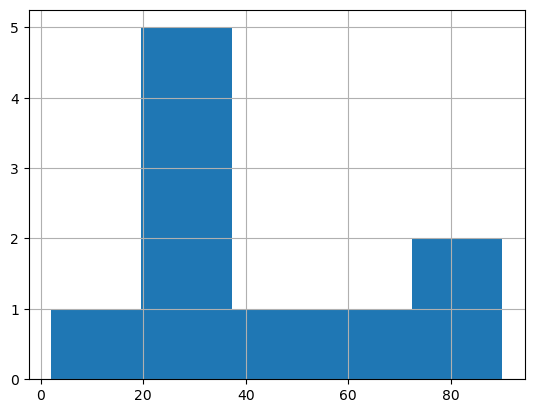

In [140]:
nums.hist(bins = 5)

<Axes: ylabel='Density'>

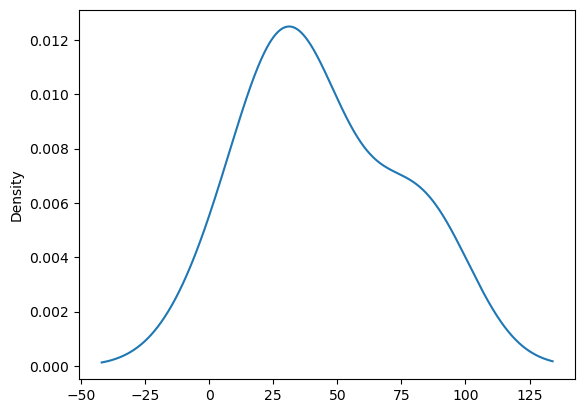

In [141]:
nums.plot(kind="kde")

#### Iteration

In [142]:
for i, n in nums.items():  # unpack index and value 
     print(f"{i} - {n}")

11 - 2
12 - 26
13 - 27
14 - 49
15 - 20
16 - 90
17 - 70
18 - 84
19 - 36
20 - 37


In [143]:
for n in nums:  # iterate values
    print(n)

2
26
27
49
20
90
70
84
36
37


#### Ranking

In [29]:
marks = pd.Series([60,70,80,60,85,75],  name = "Python")

In [30]:
marks

0    60
1    70
2    80
3    60
4    85
5    75
Name: Python, dtype: int64

In [146]:
marks.rank()

0    1.5
1    3.0
2    5.0
3    1.5
4    6.0
5    4.0
Name: Python, dtype: float64

In [147]:
marks.rank(ascending=False)

0    5.5
1    4.0
2    2.0
3    5.5
4    1.0
5    3.0
Name: Python, dtype: float64

In [148]:
marks.rank(method='min')

0    1.0
1    3.0
2    5.0
3    1.0
4    6.0
5    4.0
Name: Python, dtype: float64

In [149]:
marks.rank(method='dense')

0    1.0
1    2.0
2    4.0
3    1.0
4    5.0
5    3.0
Name: Python, dtype: float64

In [150]:
marks.rank(method='dense', ascending=False)

0    5.0
1    4.0
2    2.0
3    5.0
4    1.0
5    3.0
Name: Python, dtype: float64

In [151]:
marks.rank(method='first')

0    1.0
1    3.0
2    5.0
3    2.0
4    6.0
5    4.0
Name: Python, dtype: float64

#### Selecting rows

In [152]:
marks.head()   # First 5

0    60
1    70
2    80
3    60
4    85
Name: Python, dtype: int64

In [153]:
marks.tail(3)

3    60
4    85
5    75
Name: Python, dtype: int64

In [154]:
marks.sample(3)

0    60
5    75
4    85
Name: Python, dtype: int64

In [155]:
marks.sample(frac=0.5)   # 50% of data 

5    75
3    60
2    80
Name: Python, dtype: int64

In [37]:
sales = pd.Series( [100,120,150,100,80,200], index = [1,2,3,4,5,6])

In [157]:
# Display months where value is less than previous month 


In [158]:
pd.Series([10,20,30,15,30]).pct_change() 

0    NaN
1    1.0
2    0.5
3   -0.5
4    1.0
dtype: float64

In [159]:
sales.sort_values(ascending=False)

6    200
3    150
2    120
1    100
4    100
5     80
dtype: int64

In [160]:
sales

1    100
2    120
3    150
4    100
5     80
6    200
dtype: int64

In [161]:
sales.quantile(.25)

100.0

In [162]:
sales.quantile([.25,.50,.75])

0.25    100.0
0.50    110.0
0.75    142.5
dtype: float64

In [163]:
# Parameter is a series 
def count_even(s):
    count = 0
    for n in s:
        if n % 2 == 0:
            count +=1
    return count 

In [35]:
# Parameter is a series 
def big_small(s):  
    return ((s <= 100).sum(), (s > 100).sum())

In [34]:
# Parameter is a series 
def get_even_count(s):
    return (s % 2 == 0).sum()  

In [166]:
sales

1    100
2    120
3    150
4    100
5     80
6    200
dtype: int64

##### agg()

In [167]:
sales.agg(['sum','mean'])

sum     750.0
mean    125.0
dtype: float64

In [38]:
sales.agg(['min','max','count', get_even_count, big_small])

min                   80
max                  200
count                  6
get_even_count         6
big_small         (3, 3)
dtype: object

#### apply()

In [39]:
# Parameter is a single value from series 
def get_grade(v):
    if v > 80:
        return "A"
    elif v > 60:
        return "B"
    else:
        return "C"

In [43]:
marks = pd.Series([89,50,77,65,54,68])
marks.apply(get_grade)

0    A
1    C
2    B
3    B
4    C
5    B
dtype: object

In [42]:
# Python 
for v in map(get_grade,marks):
    print(v)

A
C
B
B
C
B


In [44]:
marks.apply(lambda v : 'Passed' if v >=70 else 'Failed')

0    Passed
1    Failed
2    Passed
3    Failed
4    Failed
5    Failed
dtype: object

In [173]:
marks.count()

6

In [174]:
marks.sort_values(ascending=False).iloc[:3]  # Top 3 marks

0    89
2    77
5    68
dtype: int64

In [175]:
marks.sort_values(ascending=False)

0    89
2    77
5    68
3    65
4    54
1    50
dtype: int64

In [176]:
marks.sort_values(ascending=False).loc[:3]   # upto index 3

0    89
2    77
5    68
3    65
dtype: int64

#### Saving series

In [177]:
sales = pd.Series((100,120,150,100,200), index  = np.arange(1,6))
sales.name  = "Sales"
sales.index.name = "Month"

In [178]:
sales

Month
1    100
2    120
3    150
4    100
5    200
Name: Sales, dtype: int64

In [179]:
sales.to_csv("sales.csv")

In [180]:
sales.to_json()

'{"1":100,"2":120,"3":150,"4":100,"5":200}'

In [45]:
sales.value_counts()

100    2
120    1
150    1
80     1
200    1
Name: count, dtype: int64

#### load from csv file 

In [46]:
# load data from csv
sales = pd.read_csv("sales.csv")

In [47]:
type(sales)

pandas.core.frame.DataFrame

In [48]:
sales

,Month,Sales
0,1,100
1,2,120
2,3,150
3,4,100
4,5,200


### Handle null (na) values

In [49]:
sales = pd.Series((100,120,150,100,200,np.nan,175,np.nan,200,100, 120, 140), 
                   index  = np.arange(1,13))
sales.name  = "Sales"
sales.index.name = "Month"

In [50]:
sales

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
6       NaN
7     175.0
8       NaN
9     200.0
10    100.0
11    120.0
12    140.0
Name: Sales, dtype: float64

In [51]:
sales.isnull()    # sales.isna()

Month
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8      True
9     False
10    False
11    False
12    False
Name: Sales, dtype: bool

In [52]:
sales.isnull().sum()  # Count null values 

2

In [189]:
sales.notna().sum()   #  Count no. of not null values 

10

In [53]:
sales.notna().value_counts()

Sales
True     10
False     2
Name: count, dtype: int64

In [191]:
sales [sales.notna()]   # Display all not null (notna) values 

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
7     175.0
9     200.0
10    100.0
11    120.0
12    140.0
Name: Sales, dtype: float64

In [192]:
sales [sales.isna()].index   # Get indexes for null values 

Index([6, 8], dtype='int32', name='Month')

In [54]:
sales.fillna(-1)     # Fill null values with -1

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
6      -1.0
7     175.0
8      -1.0
9     200.0
10    100.0
11    120.0
12    140.0
Name: Sales, dtype: float64

In [194]:
sales.dropna()  # inplace=True will modify series inplace 

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
7     175.0
9     200.0
10    100.0
11    120.0
12    140.0
Name: Sales, dtype: float64

In [195]:
sales

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
6       NaN
7     175.0
8       NaN
9     200.0
10    100.0
11    120.0
12    140.0
Name: Sales, dtype: float64

In [55]:
sales.fillna(sales.mean())

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
6     140.5
7     175.0
8     140.5
9     200.0
10    100.0
11    120.0
12    140.0
Name: Sales, dtype: float64

In [197]:
sales.mean()   # doesn't take nulls into account 

140.5

In [198]:
sales.dropna().mean()

140.5

In [199]:
sales.sum() / sales.size   # Mean by counting null values 

117.08333333333333

In [56]:
sales[1] = 200   # Modify series  

In [57]:
sales

Month
1     200.0
2     120.0
3     150.0
4     100.0
5     200.0
6       NaN
7     175.0
8       NaN
9     200.0
10    100.0
11    120.0
12    140.0
Name: Sales, dtype: float64

In [59]:
sales2  = sales.dropna()   # Gets a copy of sales 

In [60]:
sales2[1] = 50 

In [61]:
sales

Month
1     200.0
2     120.0
3     150.0
4     100.0
5     200.0
6       NaN
7     175.0
8       NaN
9     200.0
10    100.0
11    120.0
12    140.0
Name: Sales, dtype: float64

In [62]:
sales2

Month
1      50.0
2     120.0
3     150.0
4     100.0
5     200.0
7     175.0
9     200.0
10    100.0
11    120.0
12    140.0
Name: Sales, dtype: float64

In [206]:
sales.mode()

0    200.0
Name: Sales, dtype: float64

In [207]:
sales.cumsum()

Month
1      200.0
2      320.0
3      470.0
4      570.0
5      770.0
6        NaN
7      945.0
8        NaN
9     1145.0
10    1245.0
11    1365.0
12    1505.0
Name: Sales, dtype: float64

In [63]:
sales.dropna().cumsum()

Month
1      200.0
2      320.0
3      470.0
4      570.0
5      770.0
7      945.0
9     1145.0
10    1245.0
11    1365.0
12    1505.0
Name: Sales, dtype: float64

In [64]:
sales.dropna().drop_duplicates()

Month
1     200.0
2     120.0
3     150.0
4     100.0
7     175.0
12    140.0
Name: Sales, dtype: float64